
PRODUCTION PLANNING OPTIMIZATION RESULTS

Solution Status: OPTIMAL

Optimal Production Plan:
  - Product A: 0.00 units
  - Product B: 30.00 units

Maximum Profit: $900.00

Resource Utilization:
  - Labor Time: 90.0/100 hours (90.0%)
  - Raw Materials: 120.0/120 kg (100.0%)

Constraint Sensitivity (Shadow Prices):
  - Labor_Time_Constraint: -0.00 (Slack: 10.00)
  - Raw_Material_Constraint: 7.50 (Slack: -0.00)

Visualization saved as 'production_optimization.png'


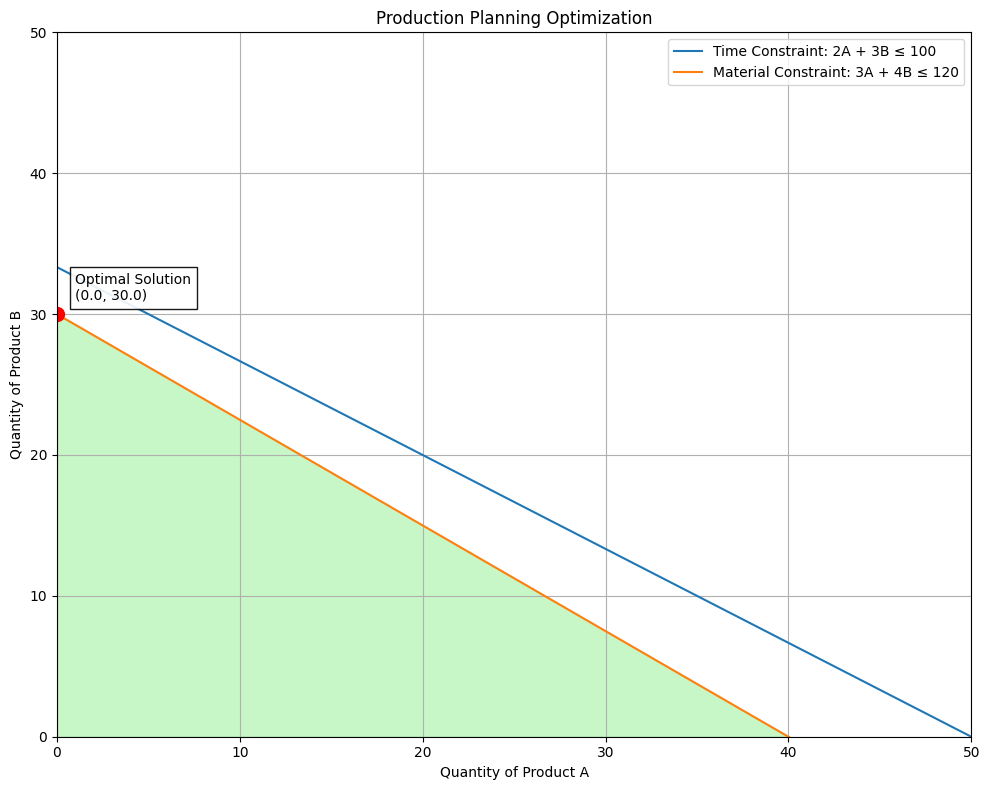

In [3]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

def solve_product_mix_problem():
    """Solve the product mix optimization problem with enhanced features."""
    
   
    prob = LpProblem("Production_Planning_Optimization", LpMaximize)

   
    product_A = LpVariable("Product_A", lowBound=0, cat='Continuous')
    product_B = LpVariable("Product_B", lowBound=0, cat='Continuous')

   
    profit_per_unit_A = 20  # dollars
    profit_per_unit_B = 30  # dollars
    prob += profit_per_unit_A * product_A + profit_per_unit_B * product_B, "Total_Profit"

   
    time_capacity = 100  # hours
    material_capacity = 120  # kg
    
    # Time constraint: 2h per A, 3h per B
    prob += 2 * product_A + 3 * product_B <= time_capacity, "Labor_Time_Constraint"
    
    # Material constraint: 3kg per A, 4kg per B
    prob += 3 * product_A + 4 * product_B <= material_capacity, "Raw_Material_Constraint"

    # Solve the problem with more robust solver options
    solver = getSolver('PULP_CBC_CMD', timeLimit=10, msg=True)
    prob.solve(solver)

    # Enhanced results output
    print("\n" + "="*50)
    print("PRODUCTION PLANNING OPTIMIZATION RESULTS")
    print("="*50)
    
    print(f"\nSolution Status: {LpStatus[prob.status].upper()}")
    
    if LpStatus[prob.status] == "Optimal":
        print("\nOptimal Production Plan:")
        print(f"  - Product A: {value(product_A):.2f} units")
        print(f"  - Product B: {value(product_B):.2f} units")
        print(f"\nMaximum Profit: ${value(prob.objective):.2f}")
        
        # Calculate resource utilization
        time_used = 2*value(product_A) + 3*value(product_B)
        material_used = 3*value(product_A) + 4*value(product_B)
        
        print("\nResource Utilization:")
        print(f"  - Labor Time: {time_used:.1f}/{time_capacity} hours ({time_used/time_capacity:.1%})")
        print(f"  - Raw Materials: {material_used:.1f}/{material_capacity} kg ({material_used/material_capacity:.1%})")
        
        # Sensitivity analysis
        print("\nConstraint Sensitivity (Shadow Prices):")
        for name, c in prob.constraints.items():
            print(f"  - {name}: {c.pi:.2f} (Slack: {c.slack:.2f})")
        
        # Visualize the solution
        visualize_solution(prob, product_A, product_B, time_capacity, material_capacity)
    else:
        print("\nNo optimal solution found. Check problem constraints.")

def visualize_solution(prob, product_A, product_B, time_capacity, material_capacity):
    """Visualize the feasible region and optimal solution."""
    try:
        # Create a grid of values
        x = np.linspace(0, 50, 100)
        y = np.linspace(0, 50, 100)
        
        # Calculate constraint lines
        y_time = (time_capacity - 2*x)/3  # Time constraint
        y_material = (material_capacity - 3*x)/4  # Material constraint
        
        # Create plot
        plt.figure(figsize=(10, 8))
        
        # Plot constraints
        plt.plot(x, y_time, label=f'Time Constraint: 2A + 3B ≤ {time_capacity}')
        plt.plot(x, y_material, label=f'Material Constraint: 3A + 4B ≤ {material_capacity}')
        
        # Fill feasible region
        y_feasible = np.minimum(y_time, y_material)
        plt.fill_between(x, 0, y_feasible, where=(y_feasible>=0), color='lightgreen', alpha=0.5)
        
        # Mark optimal solution if available
        if LpStatus[prob.status] == "Optimal":
            opt_A = value(product_A)
            opt_B = value(product_B)
            plt.plot(opt_A, opt_B, 'ro', markersize=10)
            plt.text(opt_A+1, opt_B+1, f'Optimal Solution\n({opt_A:.1f}, {opt_B:.1f})', 
                     bbox=dict(facecolor='white', alpha=0.9))
        
        # Plot settings
        plt.xlim(0, 50)
        plt.ylim(0, 50)
        plt.xlabel('Quantity of Product A')
        plt.ylabel('Quantity of Product B')
        plt.title('Production Planning Optimization')
        plt.legend()
        plt.grid(True)
        
        # Save and show plot
        plt.tight_layout()
        plt.savefig('production_optimization.png')
        print("\nVisualization saved as 'production_optimization.png'")
        plt.show()
        
    except Exception as e:
        print(f"\nVisualization error: {str(e)}")

if __name__ == "__main__":
    solve_product_mix_problem()